## Name: Yashaswini Joshi
## Unique Name: yjoshi

### 2.1 Part 1: Exploratory Social Network Analysis

In [9]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [10]:
# load all libraries
%matplotlib inline
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
from matplotlib.pyplot import subplots

In [11]:
df = pd.read_csv("amazonNetwork.csv")
df

,FromNodeId,ToNodeId
0,1,2
1,1,4
2,1,5
3,1,15
4,2,11
...,...,...
10836,2646,980
10837,2647,881
10838,2647,976
10839,2647,978


### Load the directed network graph (G) from the file amazonNetwork.csv.

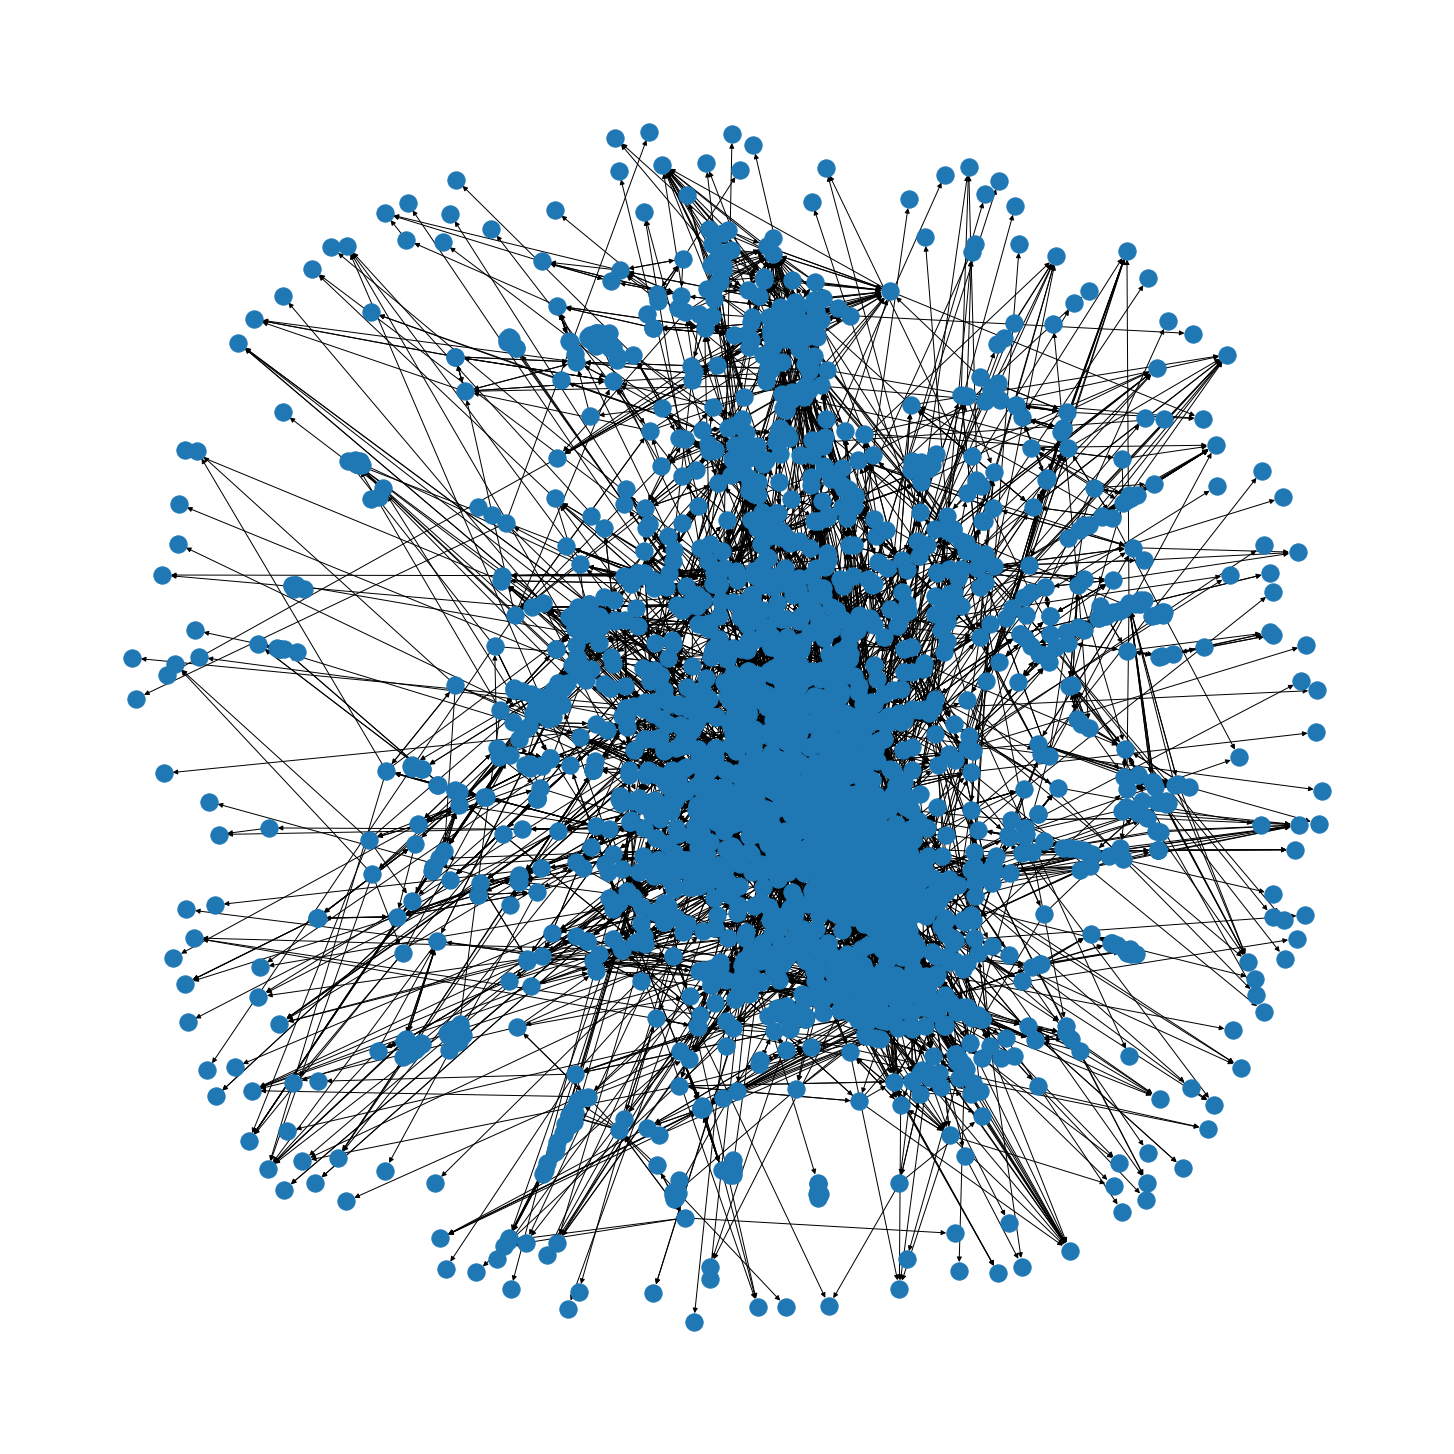

In [12]:
G = nx.from_pandas_edgelist(df, source='FromNodeId', target='ToNodeId',create_using=nx.DiGraph()) 
plt.rcParams['figure.figsize'] = 20, 20

nx.draw(G)

### How many items are present in the network and how many co-purchases happened?

In [13]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 2647
Number of edges: 10841
Average in degree:   4.0956
Average out degree:   4.0956


The number of items present in the network are: 2647

The number of co-purchases happened in the network are: 10841

### Compute the average shortest distance between the nodes in graph G. Explain your results briefly.

In [14]:
print("The average shortest distance between the nodes in graph G is: ", nx.average_shortest_path_length(G))

The average shortest distance between the nodes in graph G is:  9.592795477759587


#### Explanation: 
Average shortest distance is a concept in network topology that is defined as the average number of steps along the shortest paths for all possible pairs of network nodes. It is a measure of the efficiency of information or mass transport on a network [1]. Here, the average shortest path length is about 9.59 degrees.

### Compute the transitivity and the average clustering coefficient of the network graph G.

In [15]:
print("The transitivity of the network graph G is: ",nx.transitivity(G))

The transitivity of the network graph G is:  0.4339169154480595


In [16]:
print("The average clustering coefficient of the network graph G is: ",nx.average_clustering(G))

The average clustering coefficient of the network graph G is:  0.4086089178720651


#### Explanation: 
Transitivity is the overall probability for the network to have adjacent nodes interconnected, thus revealing the existence of tightly connected communities (or clusters, subgroups, cliques) [2]. Here, the transitivity of the network is 0.4339.

Clustering coefficient is a property of a node in a network. Roughly speaking it tells how well connected the neighborhood of the node is [3]. Here, the average clustering coefficient of the network is about 0.4, which means the neighbourhood is not fully connected. So we can say that items are not connected.

### Apply the PageRank algorithm to network G with damping value 0.5 and find the 10 nodes with the highest PageRank. Explain your findings briefly.

In [17]:
from operator import itemgetter
pr = nx.pagerank(G, alpha=0.5)
res = dict(sorted(pr.items(), key = itemgetter(1), reverse = True)[:10]) 
res

{8: 0.003624781216941063,
 481: 0.0024342886090742634,
 33: 0.0022971136999660794,
 18: 0.0021025878370248222,
 23: 0.002078673946680066,
 30: 0.0018816442748514997,
 346: 0.001862599762402043,
 99: 0.0018196338585717926,
 93: 0.00179201768671689,
 21: 0.0016587580041174607}

#### Explanation: 

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links [4]. Here, the 10 nodes with the highest PageRank are 8, 481, 33, 18, 23, 30, 346, 99, 93, 21. So these nodes represent the top 10 items searched in the amazon network. 

### 2.2 Part 2: Predicting Review-Rating using Features derived from network properties

In [18]:
G = nx.from_pandas_edgelist(df, source='FromNodeId', target='ToNodeId',create_using=nx.DiGraph()) 

Considering Clustering Coefficient, Page Rank, Degree centrality, Closeness centrality, Betweenness centrality and Degree of the node features based on the network properties

In [19]:
node = list(G.nodes())
clustering = (nx.clustering(G))
degree = (G.degree())
degree_centrality = (nx.degree_centrality(G))
closeness = (nx.closeness_centrality(G))
betweeness = (nx.betweenness_centrality(G))
pr = (nx.pagerank(G, alpha=0.5))

In [20]:
#creating a dataframe of all the features
df = pd.DataFrame(columns=['id','clustering','degree','degree_centrality','closeness','betweeness','pr'])
df.id = node
df

,id,clustering,degree,degree_centrality,closeness,betweeness,pr
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN
2,4,NaN,NaN,NaN,NaN,NaN,NaN
3,5,NaN,NaN,NaN,NaN,NaN,NaN
4,15,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2642,2542,NaN,NaN,NaN,NaN,NaN,NaN
2643,2549,NaN,NaN,NaN,NaN,NaN,NaN
2644,2545,NaN,NaN,NaN,NaN,NaN,NaN
2645,2546,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
clustering_list = []
pr_list = []
degree_centrality_list = []
closeness_list = []
betweeness_list = []
degree_list = []

for index, row in df.iterrows():
  if row['id'] in list(G.nodes()):
    row[ 'clustering'] = clustering[row['id']]
    row[ 'pr'] = pr[row['id']]
    row['degree_centrality'] = degree_centrality[row['id']]
    row[ 'closeness'] = closeness[row[ 'id']]
    row[ 'betweeness'] = betweeness[row['id']]
    row[ 'degree'] = degree[row['id']]
  else:
    row['clustering'] = np.nan
    row[ 'pr'] = np.nan
    row['degree_centrality'] = np.nan
    row[ 'closeness' ] = np.nan
    row[ 'betweeness'] = np.nan
    row[ 'degree'] = np.nan

  clustering_list.append(row[ 'clustering'])
  pr_list.append(row['pr'])
  degree_centrality_list.append(row[ 'degree_centrality'])
  closeness_list.append(row[ 'closeness'])
  betweeness_list.append(row[ 'betweeness'])
  degree_list.append(row['degree'])

df.clustering = clustering_list
df.pr = pr_list
df.degree_centrality = degree_centrality_list
df.closeness = closeness_list
df.betweeness = betweeness_list
df.degree = degree_list

In [22]:
df

,id,clustering,degree,degree_centrality,closeness,betweeness,pr
0,1,0.000000,4,0.001512,0.000000,0.000000e+00,0.000197
1,2,0.050000,5,0.001890,0.000378,8.384453e-05,0.000222
2,4,0.188830,20,0.007559,0.065922,5.048816e-03,0.000699
3,5,0.142157,15,0.005669,0.133688,4.031723e-03,0.000774
4,15,0.128743,19,0.007181,0.051976,3.746212e-02,0.000766
...,...,...,...,...,...,...,...
2642,2542,0.277778,5,0.001890,0.063380,2.614739e-04,0.000228
2643,2549,0.166667,3,0.001134,0.061987,8.334917e-08,0.000254
2644,2545,0.184211,7,0.002646,0.062745,7.222845e-04,0.000275
2645,2546,0.000000,1,0.000378,0.062794,0.000000e+00,0.000237


In [23]:
#loading train data
train = pd.read_csv("reviewTrain.csv")
train

,id,title,group,review
0,3,World War II Allied Fighter Planes Trading Cards,Book,5.0
1,5,Prayers That Avail Much for Business: Executive,Book,0.0
2,7,Batik,Music,4.5
3,10,The Edward Said Reader,Book,4.0
4,11,Resetting the Clock : Five Anti-Aging Hormone...,Book,5.0
...,...,...,...,...
1669,2667,Batman - The Animated Series - The Legend Beg...,DVD,0.0
1670,2670,Panatone: Warm,Music,4.5
1671,2671,Masculine Marine: Homoeroticism in the U.S. M...,Book,5.0
1672,2673,Storm,Music,4.5


In [24]:
# merging the train data with amazon data on id
merged_df = pd.merge(train,df,on='id',how='inner')
merged_df

,id,title,group,review,clustering,degree,degree_centrality,closeness,betweeness,pr
0,3,World War II Allied Fighter Planes Trading Cards,Book,5.0,0.450000,5,0.001890,0.000000,0.000000e+00,0.000197
1,5,Prayers That Avail Much for Business: Executive,Book,0.0,0.142157,15,0.005669,0.133688,4.031723e-03,0.000774
2,7,Batik,Music,4.5,0.109562,23,0.008692,0.150353,1.876848e-02,0.001263
3,10,The Edward Said Reader,Book,4.0,0.285714,10,0.003779,0.116834,3.049242e-03,0.000424
4,11,Resetting the Clock : Five Anti-Aging Hormone...,Book,5.0,0.120344,27,0.010204,0.008231,8.756193e-03,0.000906
...,...,...,...,...,...,...,...,...,...,...
1648,2635,Duckling (Jumbo Animal Shaped Board Books),Book,0.0,0.000000,4,0.001512,0.057290,3.284255e-02,0.000227
1649,2638,Comprehensive Curriculum of Basic Skills: Gra...,Book,4.5,0.392857,6,0.002268,0.057311,1.488339e-03,0.000257
1650,2641,Christian Ethics,Book,4.0,0.888889,5,0.001890,0.057313,0.000000e+00,0.000236
1651,2642,"Social, Emotional, and Personality Developmen...",Book,5.0,0.333333,3,0.001134,0.057332,2.524420e-04,0.000236


In [25]:
# cleaning the data by dropping na values and then setting the index on id
final_df = merged_df.copy()
final_df = final_df.dropna()
final_df = final_df.set_index("id")
final_df

,title,group,review,clustering,degree,degree_centrality,closeness,betweeness,pr
id,,,,,,,,,
3,World War II Allied Fighter Planes Trading Cards,Book,5.0,0.450000,5,0.001890,0.000000,0.000000e+00,0.000197
5,Prayers That Avail Much for Business: Executive,Book,0.0,0.142157,15,0.005669,0.133688,4.031723e-03,0.000774
7,Batik,Music,4.5,0.109562,23,0.008692,0.150353,1.876848e-02,0.001263
10,The Edward Said Reader,Book,4.0,0.285714,10,0.003779,0.116834,3.049242e-03,0.000424
11,Resetting the Clock : Five Anti-Aging Hormone...,Book,5.0,0.120344,27,0.010204,0.008231,8.756193e-03,0.000906
...,...,...,...,...,...,...,...,...,...
2635,Duckling (Jumbo Animal Shaped Board Books),Book,0.0,0.000000,4,0.001512,0.057290,3.284255e-02,0.000227
2638,Comprehensive Curriculum of Basic Skills: Gra...,Book,4.5,0.392857,6,0.002268,0.057311,1.488339e-03,0.000257
2641,Christian Ethics,Book,4.0,0.888889,5,0.001890,0.057313,0.000000e+00,0.000236


Performining Correlation analysis to check which features are mostly affecting the review ratings of the items in amazon using heatmap.

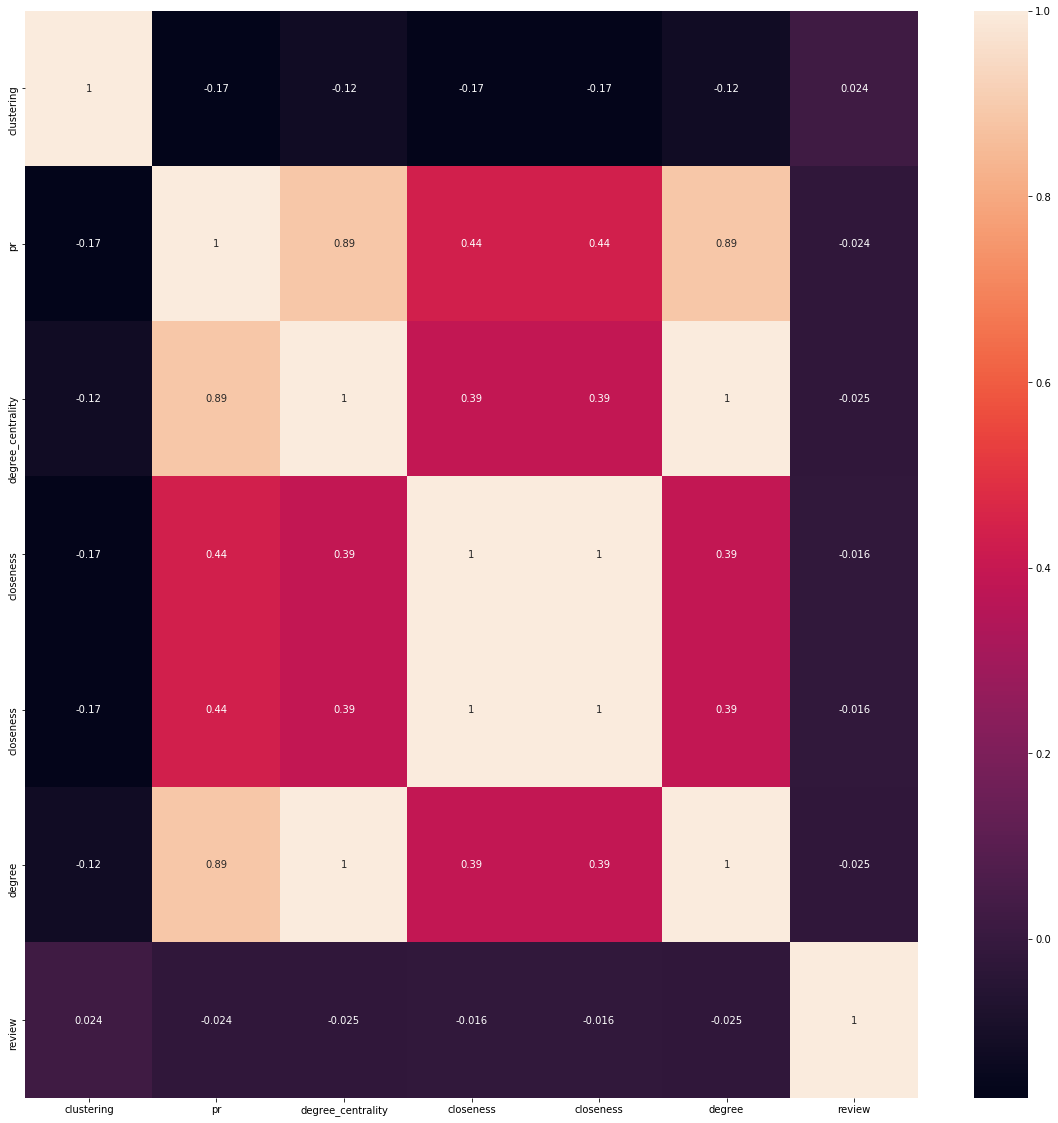

In [29]:
import seaborn as sns
features = (final_df[['clustering', 'pr', 'degree_centrality','closeness', 'closeness', 'degree','review']].corr(method='pearson'))
heatmap = sns.heatmap(features, robust=True, annot=True)
heatmap

From the above correlation we can observe that these 6 features have little correlation to the reviews.Let's also do feature importance before training different machine learning models.

In [33]:
from sklearn.ensemble import ExtraTreesClassifier

X = final_df[['clustering', 'pr', 'degree_centrality','closeness', 'closeness', 'degree']]
y = final_df.review.astype(int)

model = ExtraTreesClassifier()
model.fit(X,y)

feature_importance = (pd.DataFrame(model.feature_importances_,index=X.columns,columns=['importance']).sort_values('importance', ascending=False))
print(feature_importance)

                   importance
pr                   0.226397
closeness            0.224223
closeness            0.219969
clustering           0.196178
degree               0.067505
degree_centrality    0.065729


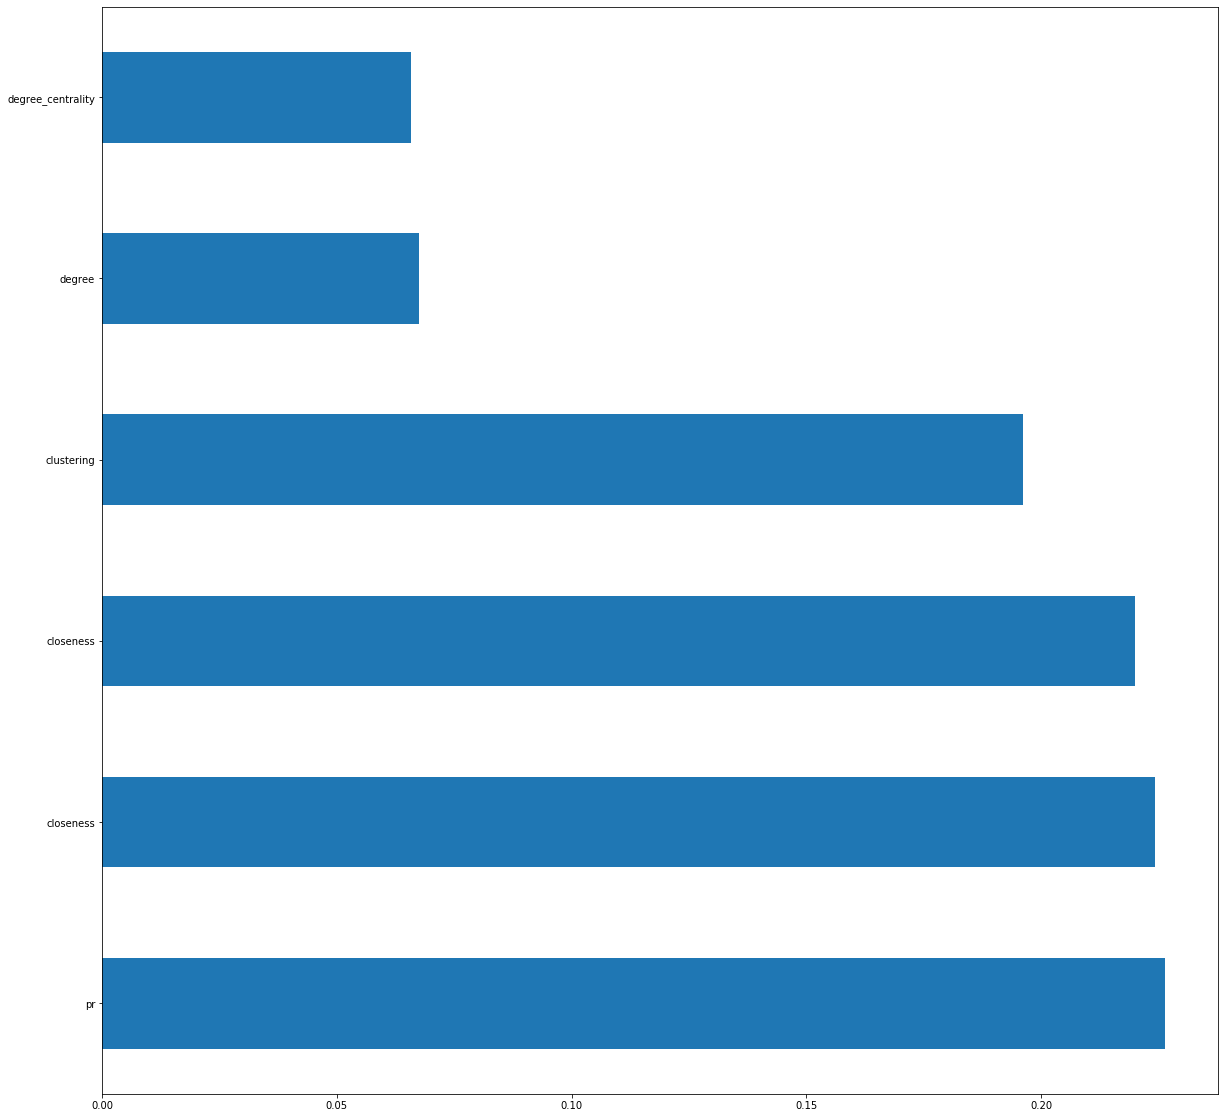

In [37]:
feature_importances_series = pd.Series(model.feature_importances_,index=X.columns)
feature_importances_series.nlargest(9).plot(kind='barh')

Now that we know which features are affecting the review ratings of amazon or higher feature importance, so let's select features clustering, closeness, betweeness, pr as X. Now let's go ahead and train different ML Models.

In [67]:
#load all the required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import svm
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

features = ['clustering', 'closeness', 'betweeness', 'pr']
X = final_df[features]
y = final_df.review.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=46)
# Scaling using MinMaxScaler()
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

1. Logistic Regression

In [55]:
reg = LogisticRegression(C=0.0001, random_state=46) 
reg.fit(X_train_scaled, y_train)

pred = reg.predict(X_test_scaled)

errs = metrics.mean_absolute_error(y_test, pred)
errs

1.3623188405797102

2. Support Vector Machine (SVM)

In [56]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
clf = svm.SVR(kernel = 'rbf', C = 10, epsilon = 0.001, gamma = 0.2)
clf.fit(X_train_scaled, y_train)
pred = clf.predict(X_test_scaled)
errs = metrics.mean_absolute_error(y_test, pred)
errs

1.3638887339061183

3. Multi-layer perceptron

In [57]:
mlp = MLPRegressor(hidden_layer_sizes=(10, 10, 10),max_iter=10000, batch_size=100, epsilon=0.0001)
mlp.fit(X_train_scaled, y_train)

pred = mlp.predict(X_test_scaled)

errs = metrics.mean_absolute_error(y_test, pred)
errs

1.633214562186464

Although the MAE is less compared to SVM and MLP, I won't be going ahead with Logistic Regression as it is used to predict binary results and the review ratings certainly is not binary(According to piazza post, comment by GSI).

Now among the other two models that I tried, SVM gave me better MAE score with 1.36 than MLP which gave me 1.63. After tuning the hyper parameters I have got 1.36 which is not a great MAE score, but that is the best score I have got for this amazon data using networkX features. So let's use SVM to predict the reviews of the test file.

In [58]:
#loading test data
test = pd.read_csv("reviewTest.csv")
test

,id,title,group,review
0,90,The Eagle Has Landed,Book,3.5
1,1372,Che in Africa: Che Guevara's Congo Diary,Book,3.5
2,1382,The Darwin Awards II : Unnatural Selection,Book,3.5
3,253,Celtic Glory,Music,4.0
4,671,Sublte Aromatherapy,Book,3.5
...,...,...,...,...
995,1097,Ahma,Music,4.0
996,1393,Loney Planet Chicago City Map (City Maps Series),Book,3.5
997,643,Swell Style : A Girl's Guide to Turning Heads...,Book,3.5
998,976,Dark Continent : Europe's Twentieth Century,Book,3.5


In [59]:
test_merged_df = pd.merge(test,df,on='id',how='inner')
test_merged_df

,id,title,group,review,clustering,degree,degree_centrality,closeness,betweeness,pr
0,90,The Eagle Has Landed,Book,3.5,0.250000,10,0.003779,0.116428,3.048563e-02,0.000347
1,1372,Che in Africa: Che Guevara's Congo Diary,Book,3.5,0.288462,8,0.003023,0.080232,9.535202e-03,0.000300
2,1382,The Darwin Awards II : Unnatural Selection,Book,3.5,0.750000,9,0.003401,0.063412,3.095826e-07,0.000338
3,253,Celtic Glory,Music,4.0,0.750000,6,0.002268,0.072458,1.031101e-04,0.000268
4,671,Sublte Aromatherapy,Book,3.5,0.562500,9,0.003401,0.093620,7.927132e-04,0.000358
...,...,...,...,...,...,...,...,...,...,...
989,1097,Ahma,Music,4.0,0.414634,10,0.003779,0.064222,1.646917e-03,0.000454
990,1393,Loney Planet Chicago City Map (City Maps Series),Book,3.5,0.315789,7,0.002646,0.078876,6.684665e-06,0.000327
991,643,Swell Style : A Girl's Guide to Turning Heads...,Book,3.5,0.550000,10,0.003779,0.093544,1.315945e-03,0.000398
992,976,Dark Continent : Europe's Twentieth Century,Book,3.5,0.101604,28,0.010582,0.085334,9.521942e-03,0.001183


In [60]:
test_df = test_merged_df.copy()

In [69]:
test_X = test_df[features]
test_X_scaled = scaler.fit_transform(test_X)
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
test_y_pred = svr.predict(test_X_scaled)
test_df["review"] = test_y_pred

In [70]:
# Round to two decimal points
rounded_review = np.round(test_df["review"], decimals=2)
test_df["review"] = rounded_review
test_df

,id,title,group,review,clustering,degree,degree_centrality,closeness,betweeness,pr
0,90,The Eagle Has Landed,Book,3.89,0.250000,10,0.003779,0.116428,3.048563e-02,0.000347
1,1372,Che in Africa: Che Guevara's Congo Diary,Book,3.90,0.288462,8,0.003023,0.080232,9.535202e-03,0.000300
2,1382,The Darwin Awards II : Unnatural Selection,Book,3.92,0.750000,9,0.003401,0.063412,3.095826e-07,0.000338
3,253,Celtic Glory,Music,3.92,0.750000,6,0.002268,0.072458,1.031101e-04,0.000268
4,671,Sublte Aromatherapy,Book,3.90,0.562500,9,0.003401,0.093620,7.927132e-04,0.000358
...,...,...,...,...,...,...,...,...,...,...
989,1097,Ahma,Music,3.90,0.414634,10,0.003779,0.064222,1.646917e-03,0.000454
990,1393,Loney Planet Chicago City Map (City Maps Series),Book,3.90,0.315789,7,0.002646,0.078876,6.684665e-06,0.000327
991,643,Swell Style : A Girl's Guide to Turning Heads...,Book,3.90,0.550000,10,0.003779,0.093544,1.315945e-03,0.000398
992,976,Dark Continent : Europe's Twentieth Century,Book,3.90,0.101604,28,0.010582,0.085334,9.521942e-03,0.001183


In [73]:
# Merge test_df and test data on id
merged_test = pd.merge(test, test_df[["id", "review"]], on='id', how='left')
merged_test.rename(columns={"review_x": "review", "review_y": "predicted_review"}, inplace=True)
merged_test

,id,title,group,review,predicted_review
0,90,The Eagle Has Landed,Book,3.5,3.89
1,1372,Che in Africa: Che Guevara's Congo Diary,Book,3.5,3.90
2,1382,The Darwin Awards II : Unnatural Selection,Book,3.5,3.92
3,253,Celtic Glory,Music,4.0,3.92
4,671,Sublte Aromatherapy,Book,3.5,3.90
...,...,...,...,...,...
995,1097,Ahma,Music,4.0,3.90
996,1393,Loney Planet Chicago City Map (City Maps Series),Book,3.5,3.90
997,643,Swell Style : A Girl's Guide to Turning Heads...,Book,3.5,3.90
998,976,Dark Continent : Europe's Twentieth Century,Book,3.5,3.90


In [74]:
submission_df = merged_test.copy()
#drop column review
submission_df.drop(columns =['review'], inplace=True)
#rename predicted_review to review
submission_df.rename(columns={"predicted_review": "review"}, inplace=True)
#write to csv
submission_df.to_csv("submission_reviewTest.csv", index=False)

### References
1. https://www.hindawi.com/journals/jam/2013/865643/
2. https://transportgeography.org/?page_id=6171
3. http://www.wandora.org/wiki/Clustering_coefficient
4. https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html